In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
file_path = 'C:/Users/luis/Desktop/Carrer Foundry boot camp/Advanced Analytics & Dashboard Design/Data/Prepared Data/merged_winners.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.shape

(5902, 77)

In [6]:
df.head()

,Fighter,Fight Date,Fight Location,City,State,Country,Winner,Is Title Bout,Weight Class,Average Knockdowns,...,Wins By Decision Split,Wins By Decision Unanimous,Wins By KO/TKO,Wins By Submission,Wins By TKO Doctor Stoppage,Fighter Stance,Fighter Height (cm),Fighter Reach (cm),Fighter Weight (lbs),Fighter Age
0,Adrian Yanez,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Bantamweight,1.000000,...,0,0,1,0,0,Orthodox,170.18,177.80,135.0,27
1,Trevin Giles,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Middleweight,1.031250,...,1,0,3,0,0,Orthodox,182.88,187.96,185.0,28
2,Tai Tuivasa,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Heavyweight,0.546875,...,0,1,3,0,0,Southpaw,187.96,190.50,264.0,28
3,Derek Brunson,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Middleweight,0.024551,...,0,4,7,1,0,Southpaw,185.42,195.58,185.0,37
4,Montel Jackson,2021-03-20,"Las Vegas, Nevada, USA",Las Vegas,Nevada,USA,Red,False,Bantamweight,0.750000,...,0,2,0,1,0,Southpaw,177.80,190.50,135.0,28


In [7]:
# List of categorical columns to be removed
categorical_columns = [
    'Fighter', 
    'Fight Date', 
    'Fight Location', 
    'City', 
    'State', 
    'Country', 
    'Winner', 
    'Is Title Bout', 
    'Weight Class', 
    'Fighter Stance', 
    'Fighter Height (cm)', 
    'Fighter Reach (cm)', 
    'Fighter Weight (lbs)'
]

# Drop the categorical columns from the dataframe
df_numerical = df.drop(columns=categorical_columns)

In [8]:
df_numerical.head()

,Average Knockdowns,Average Knockdowns Taken,Average Significant Strikes Percentage,Average Significant Strikes Percentage Taken,Average Takedown Percentage,Average Takedown Percentage Taken,Average Submission Attempts,Average Submission Attempts Taken,Average Reversals,Average Reversals Taken,...,Wins,Losses,Draws,Wins By Decision Majority,Wins By Decision Split,Wins By Decision Unanimous,Wins By KO/TKO,Wins By Submission,Wins By TKO Doctor Stoppage,Fighter Age
0,1.000000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.0000,0.000,0.00,...,1,0,0,0,0,0,1,0,0,27
1,1.031250,0.062500,0.576875,0.381250,0.406250,0.116250,0.250000,1.1875,0.375,0.25,...,4,2,0,0,1,0,3,0,0,28
2,0.546875,0.187500,0.538906,0.598594,0.000000,0.312500,0.000000,0.2500,0.000,0.00,...,4,3,0,0,0,1,3,0,0,28
3,0.024551,0.220703,0.515636,0.445974,0.355824,0.000000,0.000092,0.0000,0.000,0.00,...,12,5,0,0,0,4,7,1,0,37
4,0.750000,0.000000,0.615000,0.474375,0.668750,0.386875,0.062500,1.2500,0.625,0.00,...,3,2,0,0,0,2,0,1,0,28


In [9]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical data
df_standardized = scaler.fit_transform(df_numerical)

# Convert the standardized data back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df_numerical.columns)

In [10]:
# Display the first few rows of the standardized data
df_standardized.head()

,Average Knockdowns,Average Knockdowns Taken,Average Significant Strikes Percentage,Average Significant Strikes Percentage Taken,Average Takedown Percentage,Average Takedown Percentage Taken,Average Submission Attempts,Average Submission Attempts Taken,Average Reversals,Average Reversals Taken,...,Wins,Losses,Draws,Wins By Decision Majority,Wins By Decision Split,Wins By Decision Unanimous,Wins By KO/TKO,Wins By Submission,Wins By TKO Doctor Stoppage,Fighter Age
0,2.207853,-0.491051,0.339943,0.335124,-1.202453,-1.049021,-0.675771,-0.602231,-0.419189,-0.400529,...,-0.639025,-0.866937,0.0,-0.151836,-0.45191,-0.704740,-0.073996,-0.553540,-0.234627,-0.519884
1,2.296161,-0.274050,0.988222,-0.337801,0.421236,-0.542407,-0.290537,1.438840,0.864359,0.419913,...,0.199962,0.118078,0.0,-0.151836,1.37994,-0.704740,1.106341,-0.553540,-0.234627,-0.268647
2,0.927377,0.159951,0.668036,1.519419,-1.202453,0.312845,-0.675771,-0.172532,-0.419189,-0.400529,...,0.199962,0.610586,0.0,-0.151836,-0.45191,-0.070108,1.106341,-0.553540,-0.234627,-0.268647
3,-0.548646,0.275232,0.471801,0.215272,0.219696,-1.049021,-0.675630,-0.602231,-0.419189,-0.400529,...,2.437258,1.595601,0.0,-0.151836,-0.45191,1.833787,3.467015,0.220445,-0.234627,1.992483
4,1.501383,-0.491051,1.309727,0.457959,1.470390,0.636969,-0.579462,1.546264,1.720057,-0.400529,...,-0.079700,0.118078,0.0,-0.151836,-0.45191,0.564523,-0.664165,0.220445,-0.234627,-0.268647


### 2. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-371826.0,
 -306220.8973862332,
 -287223.23445744894,
 -273163.10033380915,
 -260979.65081939742,
 -249885.73806319313,
 -241660.3307713951,
 -236073.9846634934,
 -231346.43369312215]

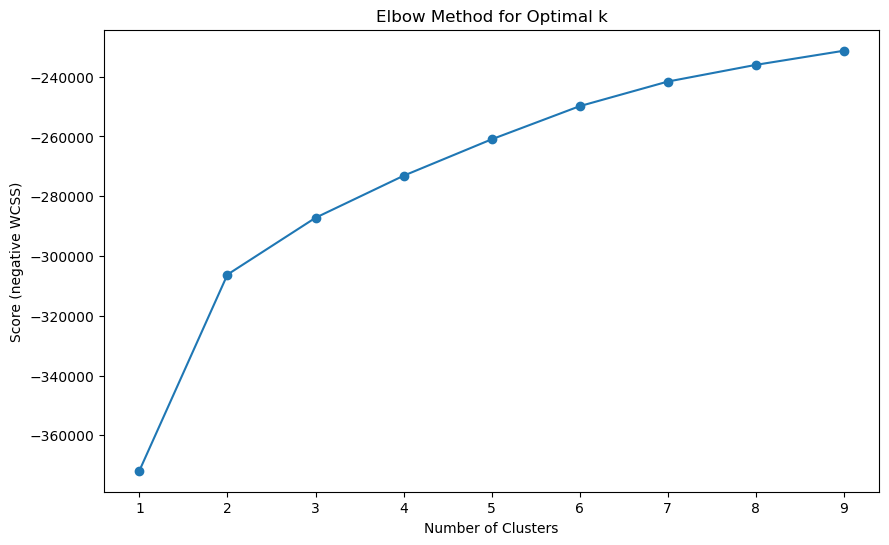

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(num_cl, score, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (negative WCSS)')
plt.show()

### Deciding the Optimal Number of Clusters

Based on the elbow plot generated, the "elbow" point is clearly visible at 3 clusters. This is where the plot starts to flatten, indicating that adding more clusters beyond this point results in diminishing returns in terms of reducing the Within-Cluster Sum of Squares (WCSS). 

### Why Choose 3 Clusters?

- **Clear Elbow Point**: The plot shows a significant drop in WCSS when moving from 1 to 3 clusters, and after 3 clusters, the reduction in WCSS starts to level off. This indicates that 3 clusters likely capture the most significant structure in the data without overfitting or adding unnecessary complexity.
  
- **Simplicity and Interpretability**: Choosing a smaller number of clusters (like 3) also makes the results easier to interpret, which is particularly important when communicating findings to stakeholders.

Given this analysis, **3 clusters** is the most appropriate choice for the k-means algorithm in this case.


### 3. k-means clustering

In [14]:
# Create the k-means object with n_init explicitly set to 10 (the current default value).
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the k-means object to the data.
kmeans.fit(df_standardized)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [15]:
# Add the cluster labels to the standardized dataframe
df_standardized['Cluster'] = kmeans.labels_

In [16]:
df_standardized.head()

,Average Knockdowns,Average Knockdowns Taken,Average Significant Strikes Percentage,Average Significant Strikes Percentage Taken,Average Takedown Percentage,Average Takedown Percentage Taken,Average Submission Attempts,Average Submission Attempts Taken,Average Reversals,Average Reversals Taken,...,Losses,Draws,Wins By Decision Majority,Wins By Decision Split,Wins By Decision Unanimous,Wins By KO/TKO,Wins By Submission,Wins By TKO Doctor Stoppage,Fighter Age,Cluster
0,2.207853,-0.491051,0.339943,0.335124,-1.202453,-1.049021,-0.675771,-0.602231,-0.419189,-0.400529,...,-0.866937,0.0,-0.151836,-0.45191,-0.704740,-0.073996,-0.553540,-0.234627,-0.519884,2
1,2.296161,-0.274050,0.988222,-0.337801,0.421236,-0.542407,-0.290537,1.438840,0.864359,0.419913,...,0.118078,0.0,-0.151836,1.37994,-0.704740,1.106341,-0.553540,-0.234627,-0.268647,0
2,0.927377,0.159951,0.668036,1.519419,-1.202453,0.312845,-0.675771,-0.172532,-0.419189,-0.400529,...,0.610586,0.0,-0.151836,-0.45191,-0.070108,1.106341,-0.553540,-0.234627,-0.268647,2
3,-0.548646,0.275232,0.471801,0.215272,0.219696,-1.049021,-0.675630,-0.602231,-0.419189,-0.400529,...,1.595601,0.0,-0.151836,-0.45191,1.833787,3.467015,0.220445,-0.234627,1.992483,1
4,1.501383,-0.491051,1.309727,0.457959,1.470390,0.636969,-0.579462,1.546264,1.720057,-0.400529,...,0.118078,0.0,-0.151836,-0.45191,0.564523,-0.664165,0.220445,-0.234627,-0.268647,0


# 1. Average Significant Strikes Landed vs. Average Takedowns Landed

## Why: 

### This can help you understand how different fighting styles (striking vs. grappling) might group fighters into clusters.

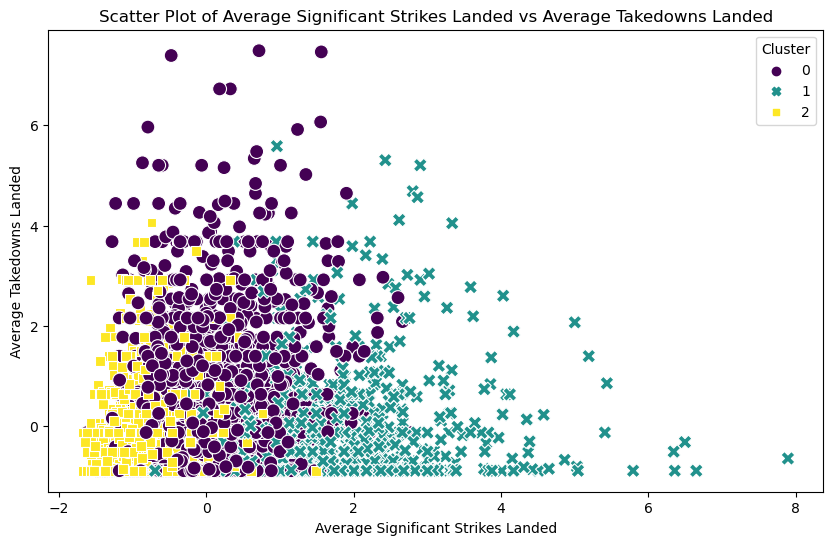

In [17]:
# Scatter plot of two variables with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Average Significant Strikes Landed'], 
                y=df_standardized['Average Takedowns Landed'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Scatter Plot of Average Significant Strikes Landed vs Average Takedowns Landed')
plt.xlabel('Average Significant Strikes Landed')
plt.ylabel('Average Takedowns Landed')
plt.legend(title='Cluster')
plt.show()

# 2. Current Win Streak vs. Longest Win Streak
## Why: 

### These variables could show how consistent performance influences cluster formation, especially in relation to winning patterns.

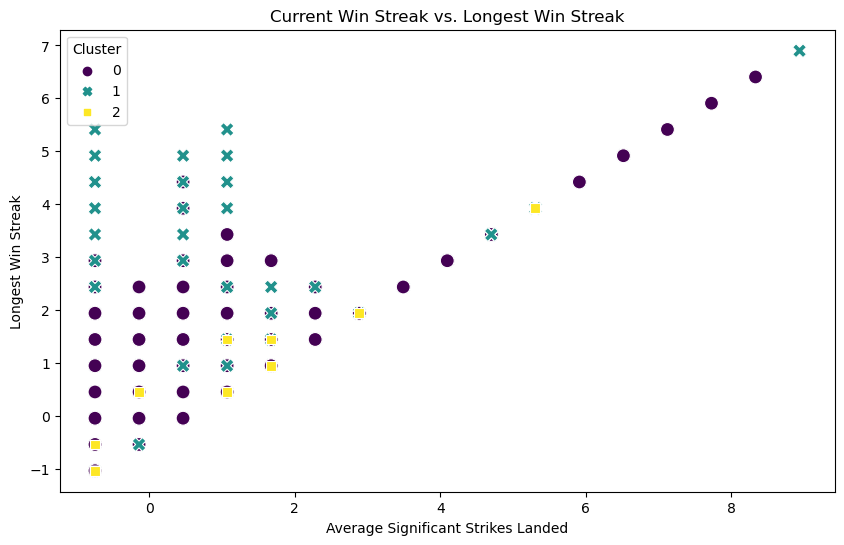

In [18]:
# Scenario 2: Current Win Streak vs. Longest Win Streak

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Current Win Streak'], 
                y=df_standardized['Longest Win Streak'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Current Win Streak vs. Longest Win Streak')
plt.xlabel('Average Significant Strikes Landed')
plt.ylabel('Longest Win Streak')
plt.legend(title='Cluster')
plt.show()

# 3. Average Control Time (Seconds) vs. Average Ground Strikes Landed
## Why: 
### This could help you analyze fighters who focus on ground control and ground-and-pound strategies, potentially revealing distinct groups of fighters who excel in these areas.

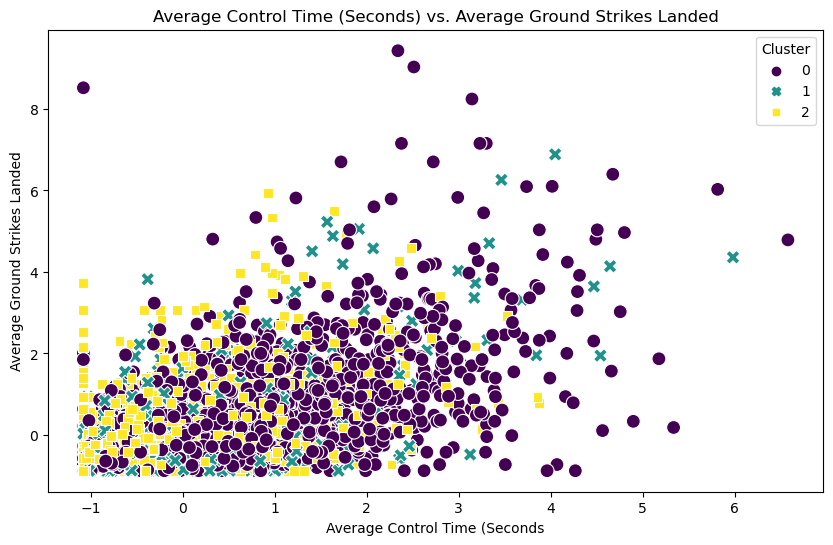

In [19]:
# Scenario 3: Average Control Time (Seconds) vs. Average Ground Strikes Landed


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Average Control Time (Seconds)'], 
                y=df_standardized['Average Ground Strikes Landed'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Average Control Time (Seconds) vs. Average Ground Strikes Landed')
plt.xlabel('Average Control Time (Seconds')
plt.ylabel('Average Ground Strikes Landed')
plt.legend(title='Cluster')
plt.show()


# 4. Wins vs. Average Significant Strikes Landed
## Why:
### This pair can show how striking success correlates with overall wins, potentially distinguishing more successful fighters from others.


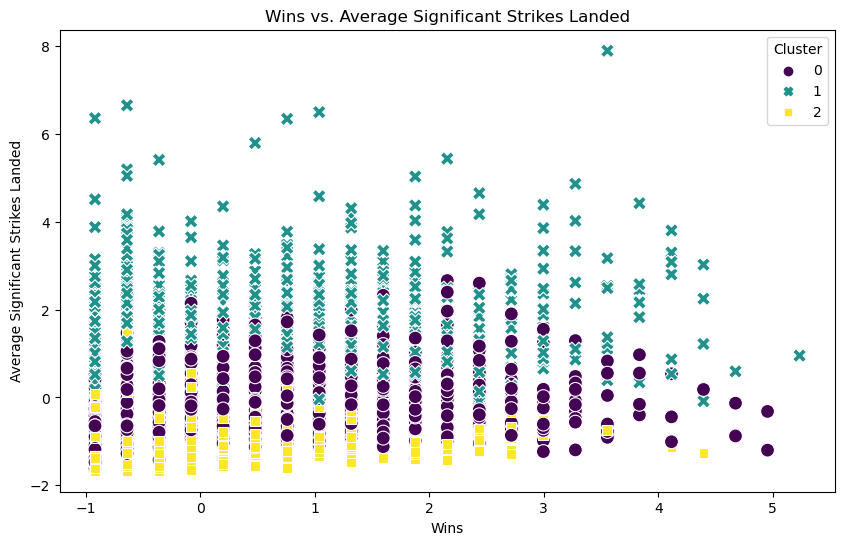

In [21]:
# Scenario 4: Wins vs. Average Significant Strikes Landed


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Wins'], 
                y=df_standardized['Average Significant Strikes Landed'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Wins vs. Average Significant Strikes Landed')
plt.xlabel('Wins')
plt.ylabel('Average Significant Strikes Landed')
plt.legend(title='Cluster')
plt.show()


# 5. Average Submission Attempts vs. Average Reversals
## Why: 
### Focusing on grappling and submission attempts can reveal clusters of fighters who prioritize submissions over other techniques, possibly showing different levels of success in this area.

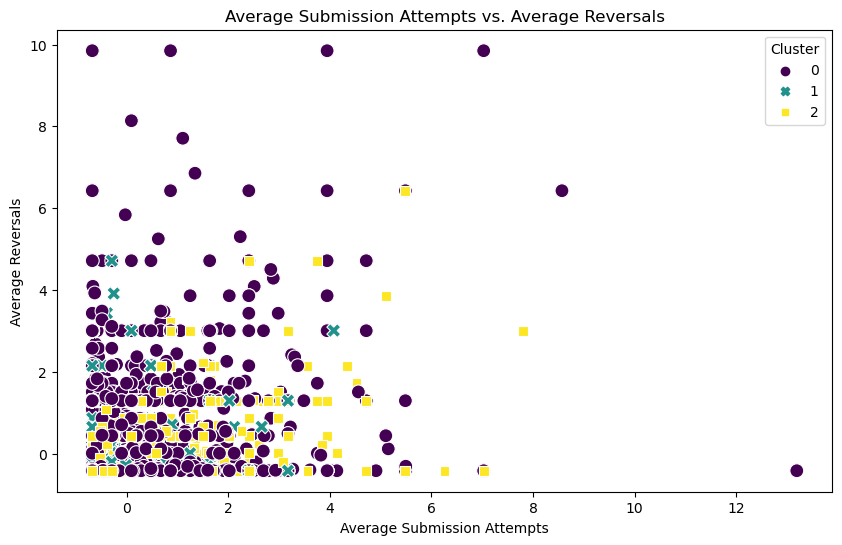

In [22]:
# Scenario 5: Average Submission Attempts vs. Average Reversals


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Average Submission Attempts'], 
                y=df_standardized['Average Reversals'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Average Submission Attempts vs. Average Reversals')
plt.xlabel('Average Submission Attempts')
plt.ylabel('Average Reversals')
plt.legend(title='Cluster')
plt.show()

# 6. Average Head Strikes Landed vs. Average Body Strikes Landed
## Why: 
### These two striking metrics might reveal different striking strategies (e.g., headhunting vs. body attacks) and how these strategies are distributed across the clusters.

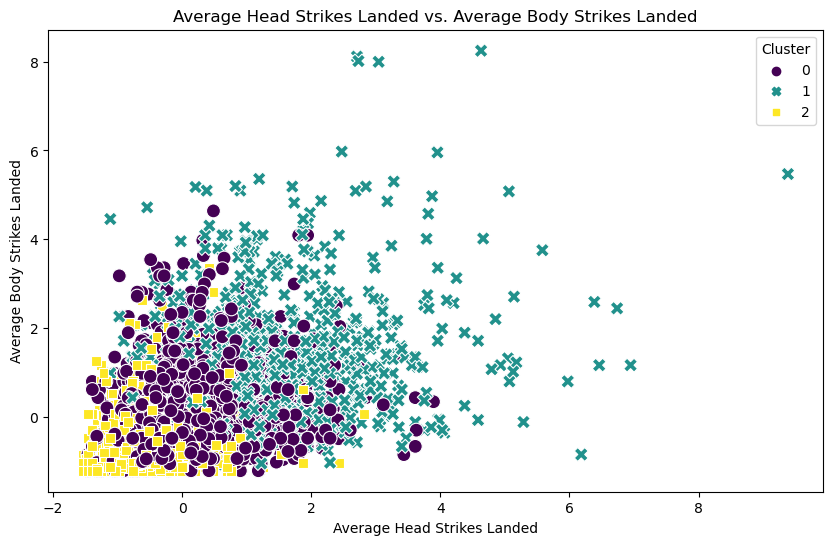

In [24]:
# Scenario 6: Average Head Strikes Landed vs. Average Body Strikes Landed


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Average Head Strikes Landed'], 
                y=df_standardized['Average Body Strikes Landed'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Average Head Strikes Landed vs. Average Body Strikes Landed')
plt.xlabel('Average Head Strikes Landed')
plt.ylabel('Average Body Strikes Landed')
plt.legend(title='Cluster')
plt.show()

# 7. Average Leg Strikes Landed vs. Average Distance Strikes Landed
## Why: 
### This pair could highlight the differences between fighters who use leg kicks versus those who prefer to strike at a distance, potentially grouping fighters into clusters based on their striking range preferences.

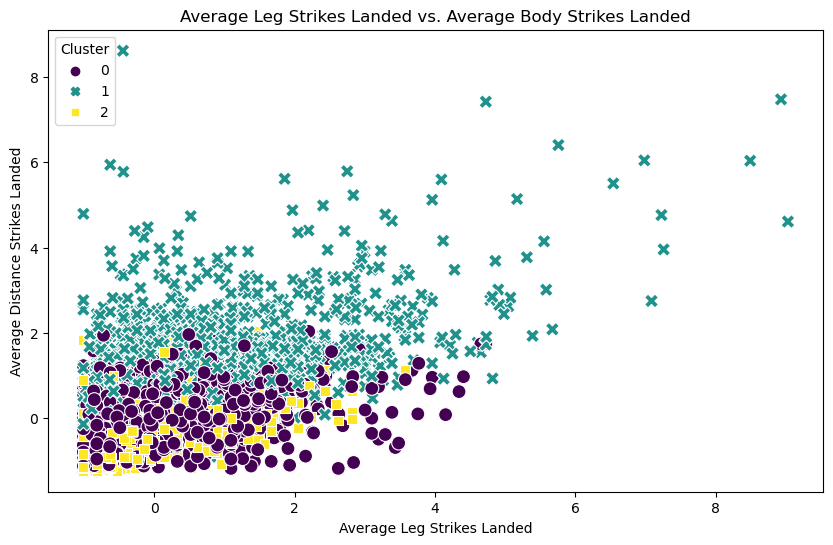

In [25]:
# Scenario 7: Average Leg Strikes Landed vs. Average Distance Strikes Landed


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Average Leg Strikes Landed'], 
                y=df_standardized['Average Distance Strikes Landed'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Average Leg Strikes Landed vs. Average Body Strikes Landed')
plt.xlabel('Average Leg Strikes Landed')
plt.ylabel('Average Distance Strikes Landed')
plt.legend(title='Cluster')
plt.show()

# 8. Wins vs. Average Takedowns Landed
## Why: 
### This can show how grappling success correlates with overall winning patterns, revealing clusters of more successful fighters in terms of takedowns.

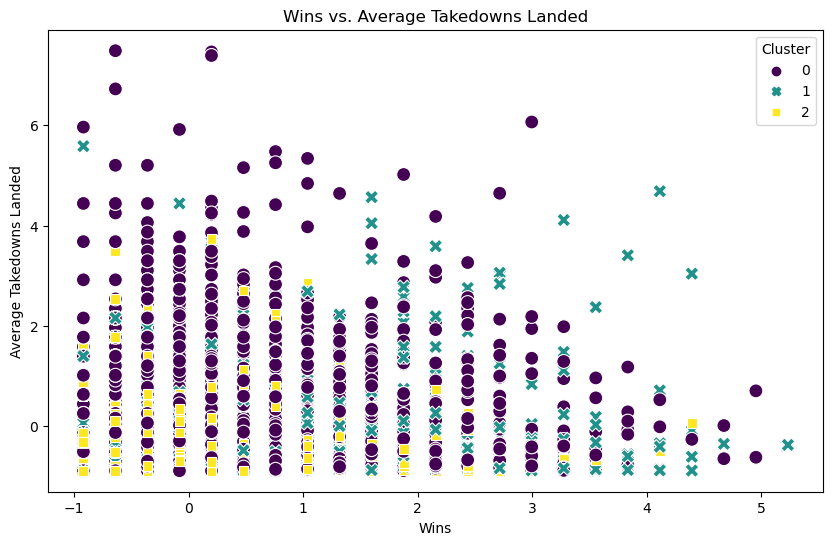

In [26]:
# Scenario 8: Wins vs. Average Takedowns Landed


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Wins'], 
                y=df_standardized['Average Takedowns Landed'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Wins vs. Average Takedowns Landed')
plt.xlabel('Wins')
plt.ylabel('Average Takedowns Landed')
plt.legend(title='Cluster')
plt.show()

# 9. Total Rounds Fought vs. Average Control Time (Seconds)
## Why: 
### This can help you understand how endurance and control influence cluster formation, possibly indicating fighters who tend to drag fights into longer rounds.

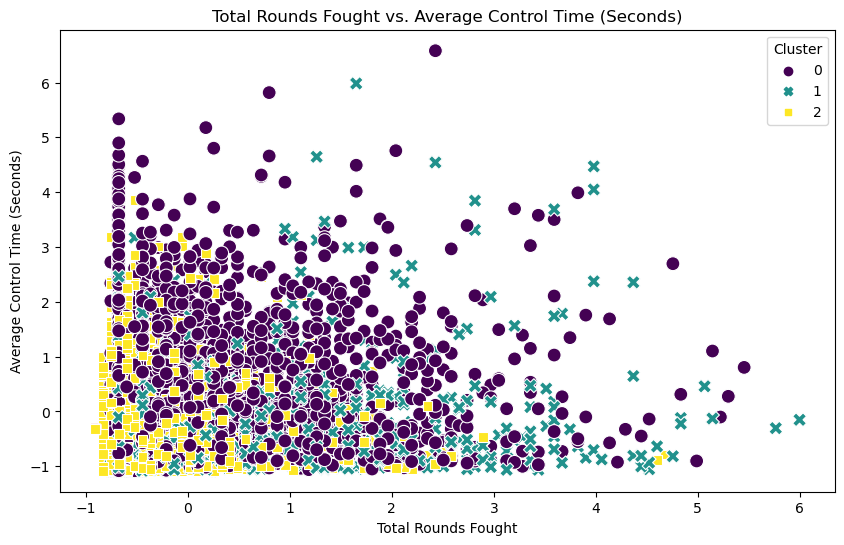

In [27]:
# Scenario 9: Total Rounds Fought vs. Average Control Time (Seconds)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Total Rounds Fought'], 
                y=df_standardized['Average Control Time (Seconds)'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Total Rounds Fought vs. Average Control Time (Seconds)')
plt.xlabel('Total Rounds Fought')
plt.ylabel('Average Control Time (Seconds)')
plt.legend(title='Cluster')
plt.show()



# 10. Wins vs. Average Knockdowns
## Why: 
### This can help identify whether knockdown power is a significant factor in clustering, potentially grouping more powerful strikers together.

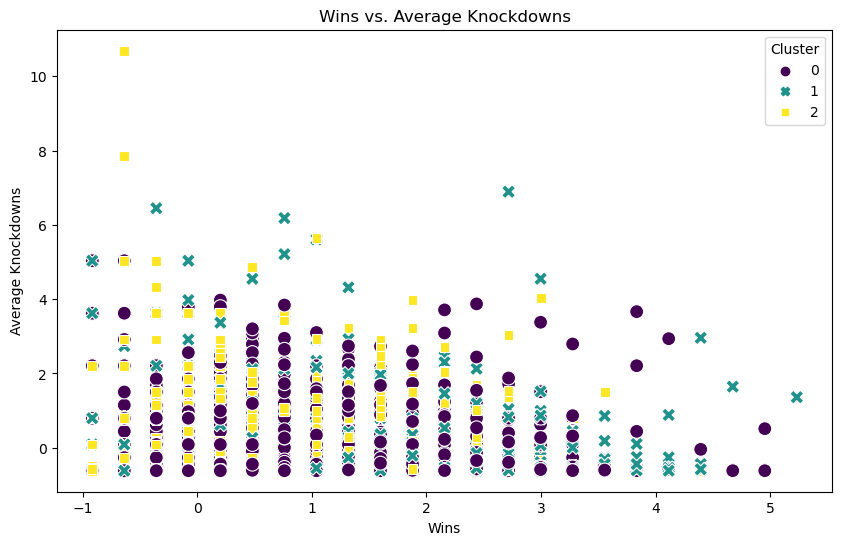

In [28]:
# Scenario 10: Wins vs. Average Knockdowns


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_standardized['Wins'], 
                y=df_standardized['Average Knockdowns'], 
                hue=df_standardized['Cluster'], 
                palette='viridis', 
                style=df_standardized['Cluster'], 
                s=100)
plt.title('Wins vs. Average Knockdowns')
plt.xlabel('Wins')
plt.ylabel('Average Knockdowns')
plt.legend(title='Cluster')
plt.show()




### Cluster Analysis Discussion

Based on the scatter plots visualizing the different variables, the clustering results seem to indicate distinct patterns among the data points, albeit with some overlap.

1. **Average Significant Strikes Landed vs. Average Takedowns Landed**:
   - We observe that Cluster 1 (teal) tends to dominate in the lower ranges of strikes landed, while Cluster 0 (purple) shows a higher concentration in the middle range of strikes landed. Cluster 2 (yellow) is spread thin, with outliers tending to land more significant strikes.

2. **Current Win Streak vs. Longest Win Streak**:
   - The clusters are reasonably separated, with Cluster 1 and 0 appearing for fighters with shorter win streaks, and Cluster 2 occupying the higher values of the win streaks. This suggests that fighters in Cluster 2 may be more dominant.

3. **Average Control Time vs. Average Ground Strikes Landed**:
   - Cluster 0 seems to be the most widespread, especially around lower values of control time. Cluster 1 dominates in situations where both control time and ground strikes landed are high.

4. **Wins vs. Average Significant Strikes Landed**:
   - There's a consistent distribution across the clusters, indicating that wins correlate with significant strikes landed, although some variation within clusters is evident.

5. **Average Submission Attempts vs. Average Reversals**:
   - There is a noticeable concentration of Cluster 0 and Cluster 1 towards the lower end of submission attempts and reversals, while Cluster 2 is more sporadically distributed.

6. **Average Head Strikes Landed vs. Average Body Strikes Landed**:
   - Clusters show a distinct pattern with Cluster 1 being more concentrated around low values for both head and body strikes, and Cluster 0 showing a broader range.

7. **Average Leg Strikes Landed vs. Average Distance Strikes Landed**:
   - Again, we see that Cluster 1 tends to cover a broader area of both variables, while Cluster 2 is more spread in terms of distance strikes, suggesting differing fighting styles.

8. **Wins vs. Average Takedowns Landed**:
   - Wins correlate with takedowns landed, but there are clusters spread across various levels, suggesting that fighters have different methods of winning, with some relying more on takedowns than others.

9. **Total Rounds Fought vs. Average Control Time**:
   - Clusters are distributed widely across this plot, indicating that total rounds fought doesn’t strongly correspond with control time within specific clusters.

10. **Wins vs. Average Knockdowns**:
    - Cluster 0 tends to dominate in the lower values for both wins and knockdowns, while Cluster 2 extends more towards higher knockdowns and wins, indicating a possible strength in finishing fights early for this cluster.

Overall, the clusters seem to make sense in terms of separating different fighting styles and performance levels. Fighters in Cluster 2 tend to have higher stats across multiple dimensions, indicating they might be stronger or more dominant. Cluster 0 and Cluster 1 represent lower performance groups with varied fighting strategies. There may still be some overlap, suggesting the need for further exploration or refinement of the data.


In [32]:
# Calculate descriptive statistics for the clusters
cluster_stats = df_standardized.groupby('Cluster').describe()

In [33]:
cluster_stats

Average Knockdowns                                                    \
                     count      mean       std       min       25%       50%   
Cluster                                                                        
0                   1999.0 -0.041341  0.897700 -0.618025 -0.618025 -0.529716   
1                   1014.0  0.056174  1.076153 -0.618025 -0.618025 -0.486942   
2                   2889.0  0.008889  1.038036 -0.618025 -0.618025 -0.484733   

                             Average Knockdowns Taken            ...  \
              75%        max                    count      mean  ...   
Cluster                                                          ...   
0        0.176753   5.033730                   1999.0  0.058735  ...   
1        0.303869   6.891059                   1014.0  0.056176  ...   
2        0.265062  10.685485                   2889.0 -0.060358  ...   

        Wins By TKO Doctor Stoppage           Fighter Age                      \
                                75%       max       count      mean       std   
Cluster                                                                         
0                         -0.234627  7.746748      1999.0  0.114429  1.034327   
1                         -0.234627  7.746748      1014.0  0.211032  0.929833   
2                         -0.234627  7.746748      2889.0 -0.153247  0.975721   

                                                           
              min       25%       50%       75%       max  
Cluster                                                    
0       -2.278540 -0.519884 -0.017410  0.736300  4.504849  
1       -2.278540 -0.519884  0.233826  0.736300  3.248666  
2       -2.529777 -0.771120 -0.268647  0.485063  4.002376  

[3 rows x 512 columns]

## Cluster Analysis Findings

Based on the analysis of clusters derived from the k-means clustering algorithm, the following conclusions can be drawn:

### 1. **Different Fighting Styles and Strategies**
   - **Cluster Characteristics**: Each cluster may represent distinct types of fighters based on their fighting styles and strategies. For example, one cluster might consist of fighters who rely heavily on striking (with higher `Average Significant Strikes Landed` and `Average Knockdowns`), while another cluster could represent grapplers (with higher `Average Takedowns Landed`, `Average Submission Attempts`, or `Control Time`).
   - **Cluster Contrast**: Comparing different metrics between clusters reveals how fighters in one group rely more on striking, while fighters in another group have more success with takedowns or grappling.

### 2. **Performance-Based Clustering**
   - **Wins and Streaks**: Clusters may separate fighters based on their win rates and streaks. One cluster could represent fighters with more wins and longer win streaks, while another could represent fighters who struggle to maintain consistent performance.
   - **Metrics of Success**: Clusters associated with higher win rates are often characterized by specific metrics, such as `Average Significant Strikes Landed` or `Average Takedowns Landed`, which might indicate key factors in fight success.

### 3. **Inconsistencies in Fighter Performance**
   - **Variability within Clusters**: Some clusters may have more consistent fighters, while others show greater variability. For example, clusters with high variance in `Average Takedowns Landed` or `Average Significant Strikes Landed` may indicate inconsistent performances among fighters within the group.
   - **Fighter Specialization**: Some clusters represent fighters specializing in specific areas (e.g., striking or grappling), while others represent more well-rounded fighters who may perform moderately in several areas.

### 4. **Opportunities for Fighter Improvement**
   - **Low-Performing Clusters**: Clusters that consistently show lower values in performance metrics (e.g., wins, strikes) could represent fighters who need improvement. Targeting specific areas like grappling or striking could enhance their overall fighting performance.
   - **Training Focus**: Fighters excelling in one area (e.g., striking) but lacking in others might benefit from balanced training to cover weaknesses.

### 5. **Balanced vs. Specialized Fighters**
   - **Balanced Fighters**: Clusters with consistent but moderate performance across metrics may represent balanced fighters who are well-rounded but not specialized in one area.
   - **Specialized Fighters**: Clusters showing fighters excelling in one area (e.g., striking) but lacking in others suggest reliance on specific strategies, which could make them vulnerable to well-rounded opponents.

### 6. **Insights into Fight Strategy**
   - **Win Rate and Strategy**: Clusters with higher win rates may provide insights into which strategies or metrics lead to success. Fighters in clusters with high control time and ground strikes may indicate the importance of dominating fights on the ground.
   - **Balanced Strategy vs. Aggression**: Clusters where fighters land more strikes but still lose suggest that aggression alone doesn't guarantee victory. Balance between offense, defense, and fight strategy could be key to consistent success.

### 7. **Cluster Size and Fighter Population**
   - **Common vs. Rare Fighter Types**: Larger clusters may represent common fighter types (e.g., well-rounded or moderately successful fighters), while smaller clusters could represent elite or specialized fighters.

### Conclusion:
This clustering analysis provides valuable insights into fighter types, successful strategies, and areas for improvement. It highlights how different approaches to fighting, whether balanced or specialized, influence fight outcomes. These insights can be useful for optimizing fighter performance, refining training focus, and understanding what makes a fighter successful in MMA.


# Possible Pipelines

## Future Steps in the Analytics Pipeline: Proposals for Leveraging Clustering Results

The clustering results can provide a strong foundation for further analysis and predictive modeling in the analytics pipeline. Below are some key proposals on how these results could be used in future steps:

### 1. **Predictive Modeling**
   - **Outcome Prediction**: The cluster groups could serve as features or predictors in building predictive models. For example, we could develop models to predict fight outcomes (win/loss) based on the cluster a fighter belongs to, providing insights into the likelihood of winning for each group.
   - **Fighter Performance Prediction**: These clusters could be useful in predicting future performance. By identifying the performance trajectory of fighters in each cluster, we could predict how well a fighter might perform in future matches based on their cluster membership.

### 2. **Segmentation for Training Programs**
   - **Personalized Training Programs**: The clusters represent distinct groups of fighters based on their strengths and weaknesses. These insights could be used to develop targeted training programs. For example, fighters in clusters with poor takedown performance could be guided to focus on grappling and submission training.
   - **Focus on Strengths and Weaknesses**: Identifying clusters where fighters are strong in certain areas but lacking in others allows coaches to focus on improving specific skills. This can optimize training sessions by ensuring fighters are improving in areas that directly contribute to their success.

### 3. **Exploratory Data Analysis for Strategy Development**
   - **Strategy Refinement**: Clustering fighters based on their fight statistics can help coaches and analysts develop strategies tailored to each fighter’s strengths. For example, fighters in clusters with high striking abilities could focus on exploiting striking in future matches, while fighters in clusters strong in grappling could focus on ground control strategies.
   - **Matchup Analysis**: These clusters could be used to analyze potential matchups. By comparing clusters, we can assess how fighters from different groups might perform against each other and devise strategies based on expected strengths and weaknesses.

### 4. **Enhanced Feature Engineering**
   - **Cluster Membership as a Feature**: In future models, the cluster a fighter belongs to can be added as a feature. This additional feature could improve the performance of models predicting outcomes, performance metrics, or fight durations.
   - **Interaction Effects**: By using cluster information, we can explore interaction effects between a fighter’s characteristics and their cluster membership, revealing deeper insights into which variables drive success within each cluster.

### 5. **Fight Promotion and Audience Segmentation**
   - **Marketing Insights**: Fight promoters and marketing teams can use these clusters to segment fighters and tailor promotional strategies. For instance, clusters that represent more aggressive or exciting fighting styles may attract more attention, allowing for focused marketing efforts.
   - **Audience Targeting**: Clusters can also be leveraged to identify what type of fights or fighter attributes appeal to different segments of the audience, leading to more tailored and effective promotional strategies for various demographics.

### 6. **Longitudinal Performance Tracking**
   - **Tracking Fighter Development**: Over time, clusters can be used to track how fighters evolve. Fighters may move between clusters as they improve or decline, giving insights into how training impacts performance and the longevity of a fighter's success.
   - **Fighter Potential**: For newer fighters, clustering analysis could be used to identify those with the potential for growth based on similarities to more experienced fighters in specific clusters.

### 7. **Advanced Analytics and Machine Learning**
   - **Anomaly Detection**: Future steps could involve using clustering results for anomaly detection. Fighters who don’t fit within the existing clusters could represent outliers or anomalies, providing insights into unique fighting styles or potential misclassifications.
   - **Further Dimensionality Reduction**: The clustering results could be combined with dimensionality reduction techniques like PCA (Principal Component Analysis) to further simplify the feature space while preserving the most important patterns.

### 8. **Performance Metrics Monitoring**
   - **Monitoring Cluster Dynamics**: The performance of fighters within each cluster can be monitored over time. If certain clusters consistently produce high-performing fighters, these clusters can be prioritized in scouting or development efforts.
   - **Key Metric Identification**: Using the clusters, we can identify which specific performance metrics are most correlated with success, allowing for better monitoring of key metrics during training and competitions.

### Conclusion:
The results from the clustering analysis provide an excellent foundation for a wide range of applications in predictive modeling, strategy development, performance monitoring, and marketing. By leveraging the insights gained from this clustering process, the next steps in the analytics pipeline can yield even more actionable outcomes, improving fighter performance, strategy formulation, and overall business decisions.
